In [37]:
import pandas as pd

In [38]:
df=pd.read_csv("wether.csv")
df

,Unnamed: 0,temp,feelslike,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,purchasing price (dollar/kWh),...,Load (kWh),PV (kWh),CI(gco2/kWh),Hour,Weekday,Month,Natural Gas Price ($/M Btu),Crude Oil (($/Barrel)),No. 2 Heating Oil ($/Gallon),No. 2 Diesel Fuel (($/Gallon))
0,2012-01-01T00:00:00,-4.0,-11.3,49.86,0.0,26.7,1024.9,41.6,16.0,0.3168,...,2698,0.000000,184,0,1,1,2.97,102.96,3.040,3.087
1,2012-01-01T01:00:00,-4.1,-11.2,50.05,0.0,25.5,1025.5,97.9,16.0,0.2988,...,2558,0.000000,182,1,1,1,2.97,102.96,3.040,3.087
2,2012-01-01T02:00:00,-3.2,-11.1,46.07,0.0,34.2,1026.0,100.0,16.0,0.2701,...,2444,0.000000,171,2,1,1,2.97,102.96,3.040,3.087
3,2012-01-01T03:00:00,-3.1,-11.5,46.33,0.0,40.0,1026.8,100.0,16.0,0.2606,...,2402,0.000000,169,3,1,1,2.97,102.96,3.040,3.087
4,2012-01-01T04:00:00,-4.1,-12.6,50.07,0.0,37.8,1027.9,19.5,16.0,0.2564,...,2403,0.000000,159,4,1,1,2.97,102.96,3.040,3.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31T19:00:00,-10.3,-10.3,80.94,0.0,0.0,1021.4,100.0,10.0,0.8394,...,3769,0.258288,126,19,2,12,3.43,91.83,3.044,3.074
8780,2012-12-31T20:00:00,-10.9,-14.7,84.82,0.0,6.3,1020.9,100.0,10.8,0.7951,...,3585,0.000000,115,20,2,12,3.43,91.83,3.044,3.074
8781,2012-12-31T21:00:00,-11.6,-16.1,80.03,0.0,7.5,1021.3,100.0,10.8,0.7313,...,3407,0.000000,99,21,2,12,3.43,91.83,3.044,3.074
8782,2012-12-31T22:00:00,-11.8,-15.0,81.03,0.0,5.1,1021.4,100.0,11.1,0.7010,...,3219,0.000000,85,22,2,12,3.43,91.83,3.044,3.074


# Data Analysis

In [21]:
def classify_columns(df):
    qualitative = []
    quantitative = []

    for col in df.columns:
        if df[col].dtype == 'object':
            qualitative.append(col)
        else:
            quantitative.append(col)

    return qualitative, quantitative

qualitative_cols, quantitative_cols = classify_columns(df)

print("Qualitative (Categorical) Columns:", qualitative_cols)
print("Quantitative (Numerical) Columns:", quantitative_cols)


Qualitative (Categorical) Columns: ['Unnamed: 0']
Quantitative (Numerical) Columns: ['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'sealevelpressure', 'cloudcover', 'visibility', 'purchasing price (dollar/kWh)', 'Unmet(kWh)', 'Load (kWh)', 'PV (kWh)', 'CI(gco2/kWh)', 'Hour', 'Weekday', 'Month', 'Natural Gas Price ($/M Btu)', 'Crude Oil (($/Barrel))', 'No. 2 Heating Oil ($/Gallon)', 'No. 2 Diesel Fuel (($/Gallon))']


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      8784 non-null   object 
 1   temp                            8784 non-null   float64
 2   feelslike                       8784 non-null   float64
 3   humidity                        8784 non-null   float64
 4   precip                          8784 non-null   float64
 5   windspeed                       8784 non-null   float64
 6   sealevelpressure                8784 non-null   float64
 7   cloudcover                      8784 non-null   float64
 8   visibility                      8784 non-null   float64
 9   purchasing price (dollar/kWh)   8784 non-null   float64
 10  Unmet(kWh)                      8784 non-null   float64
 11  Load (kWh)                      8784 non-null   int64  
 12  PV (kWh)                        87

In [23]:
df.isnull().sum()

Unnamed: 0                        0
temp                              0
feelslike                         0
humidity                          0
precip                            0
windspeed                         0
sealevelpressure                  0
cloudcover                        0
visibility                        0
purchasing price (dollar/kWh)     0
Unmet(kWh)                        0
Load (kWh)                        0
PV (kWh)                          0
CI(gco2/kWh)                      0
Hour                              0
Weekday                           0
Month                             0
Natural Gas Price ($/M Btu)       0
Crude Oil (($/Barrel))            0
No. 2 Heating Oil ($/Gallon)      0
No. 2 Diesel Fuel (($/Gallon))    0
dtype: int64

In [24]:
df.describe()

,temp,feelslike,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,purchasing price (dollar/kWh),Unmet(kWh),Load (kWh),PV (kWh),CI(gco2/kWh),Hour,Weekday,Month,Natural Gas Price ($/M Btu),Crude Oil (($/Barrel)),No. 2 Heating Oil ($/Gallon),No. 2 Diesel Fuel (($/Gallon))
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,7.823486,5.253893,62.059443,0.032683,17.583026,1014.076161,32.436669,15.123076,0.387689,2907.333239,3255.071380,347.738141,187.391849,11.500000,3.986339,6.513661,2.752803,94.121803,3.024265,3.111454
std,12.475871,14.712420,22.106930,0.265712,10.215923,8.262942,42.331880,2.802104,0.150264,590.708360,567.993958,526.375913,59.218272,6.922581,2.003480,3.451430,0.482731,7.690371,0.176457,0.181059
min,-24.900000,-37.900000,8.610000,0.000000,0.000000,984.700000,0.000000,0.000000,0.125200,1368.042829,1979.000000,0.000000,39.000000,0.000000,1.000000,1.000000,1.820000,77.720000,2.530000,2.262000
25%,-1.100000,-5.900000,44.427500,0.000000,10.400000,1008.800000,0.000000,16.000000,0.288975,2456.000000,2798.750000,0.000000,143.000000,5.750000,2.000000,4.000000,2.380000,87.460000,2.946000,3.038000
50%,7.900000,5.100000,65.945000,0.000000,15.500000,1014.200000,0.000000,16.000000,0.360900,2857.289848,3316.000000,8.781816,193.000000,11.500000,4.000000,7.000000,2.740000,92.550000,3.061000,3.159000
75%,17.225000,17.225000,80.570000,0.000000,23.400000,1019.200000,80.500000,16.000000,0.455625,3321.629896,3641.000000,561.067671,233.000000,17.250000,6.000000,10.000000,3.180000,100.700000,3.157000,3.254000
max,39.600000,39.600000,100.000000,10.548000,78.500000,1042.300000,100.000000,16.000000,1.000000,4763.684513,4912.000000,1796.010614,345.000000,23.000000,7.000000,12.000000,3.770000,109.390000,3.303000,3.378000


In [39]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


import pandas as pd
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])  # Convert to datetime

# Extract useful time-based features
df['Year'] = df['Unnamed: 0'].dt.year
df['Month'] = df['Unnamed: 0'].dt.month
df['Day'] = df['Unnamed: 0'].dt.day
df['Hour'] = df['Unnamed: 0'].dt.hour
df['Weekday'] = df['Unnamed: 0'].dt.weekday

# Check categorical columns again
categorical_cols = df.select_dtypes(include=['object']).columns
print("Updated Categorical Columns:", categorical_cols)


Categorical Columns: Index(['Unnamed: 0'], dtype='object')
Updated Categorical Columns: Index([], dtype='object')


In [40]:
# Classify columns
def classify_columns_v2(df):
    categorical = df.select_dtypes(include=['object']).columns.tolist()
    numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    datetime = df.select_dtypes(include=['datetime64']).columns.tolist()
    return categorical, numerical, datetime

categorical_cols, numerical_cols, datetime_cols = classify_columns_v2(df)

# Display results
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)
print("Datetime Columns:", datetime_cols)

Categorical Columns: []
Numerical Columns: ['temp', 'feelslike', 'humidity', 'precip', 'windspeed', 'sealevelpressure', 'cloudcover', 'visibility', 'purchasing price (dollar/kWh)', 'Unmet(kWh)', 'Load (kWh)', 'PV (kWh)', 'CI(gco2/kWh)', 'Hour', 'Weekday', 'Month', 'Natural Gas Price ($/M Btu)', 'Crude Oil (($/Barrel))', 'No. 2 Heating Oil ($/Gallon)', 'No. 2 Diesel Fuel (($/Gallon))', 'Year', 'Day']
Datetime Columns: ['Unnamed: 0']


In [41]:
data = df.copy()
data

,Unnamed: 0,temp,feelslike,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,purchasing price (dollar/kWh),...,CI(gco2/kWh),Hour,Weekday,Month,Natural Gas Price ($/M Btu),Crude Oil (($/Barrel)),No. 2 Heating Oil ($/Gallon),No. 2 Diesel Fuel (($/Gallon)),Year,Day
0,2012-01-01 00:00:00,-4.0,-11.3,49.86,0.0,26.7,1024.9,41.6,16.0,0.3168,...,184,0,6,1,2.97,102.96,3.040,3.087,2012,1
1,2012-01-01 01:00:00,-4.1,-11.2,50.05,0.0,25.5,1025.5,97.9,16.0,0.2988,...,182,1,6,1,2.97,102.96,3.040,3.087,2012,1
2,2012-01-01 02:00:00,-3.2,-11.1,46.07,0.0,34.2,1026.0,100.0,16.0,0.2701,...,171,2,6,1,2.97,102.96,3.040,3.087,2012,1
3,2012-01-01 03:00:00,-3.1,-11.5,46.33,0.0,40.0,1026.8,100.0,16.0,0.2606,...,169,3,6,1,2.97,102.96,3.040,3.087,2012,1
4,2012-01-01 04:00:00,-4.1,-12.6,50.07,0.0,37.8,1027.9,19.5,16.0,0.2564,...,159,4,6,1,2.97,102.96,3.040,3.087,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,-10.3,-10.3,80.94,0.0,0.0,1021.4,100.0,10.0,0.8394,...,126,19,0,12,3.43,91.83,3.044,3.074,2012,31
8780,2012-12-31 20:00:00,-10.9,-14.7,84.82,0.0,6.3,1020.9,100.0,10.8,0.7951,...,115,20,0,12,3.43,91.83,3.044,3.074,2012,31
8781,2012-12-31 21:00:00,-11.6,-16.1,80.03,0.0,7.5,1021.3,100.0,10.8,0.7313,...,99,21,0,12,3.43,91.83,3.044,3.074,2012,31
8782,2012-12-31 22:00:00,-11.8,-15.0,81.03,0.0,5.1,1021.4,100.0,11.1,0.7010,...,85,22,0,12,3.43,91.83,3.044,3.074,2012,31


# Normalization techniques

In [48]:
print(df.skew())      # Skewness: measure of asymmetry
print(df.kurtosis())  # Kurtosis: measure of "tailedness"


temp                              -0.053948
feelslike                         -0.173834
humidity                          -0.383365
precip                            17.681211
windspeed                          0.956406
sealevelpressure                   0.072734
cloudcover                         0.729317
visibility                        -3.599843
purchasing price (dollar/kWh)      1.408491
Unmet(kWh)                         0.271104
Load (kWh)                         0.037923
PV (kWh)                           1.308525
CI(gco2/kWh)                      -0.204168
Hour                              -0.000054
Weekday                            0.000000
Month                             -0.006232
Natural Gas Price ($/M Btu)        0.044110
Crude Oil (($/Barrel))             0.174029
No. 2 Heating Oil ($/Gallon)      -0.956702
No. 2 Diesel Fuel (($/Gallon))    -1.094777
Year                               0.000000
Day                                0.004479
dtype: float64
temp             

C:\Users\USER\AppData\Local\Temp\ipykernel_9496\2823919555.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.skew())      # Skewness: measure of asymmetry
C:\Users\USER\AppData\Local\Temp\ipykernel_9496\2823919555.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.kurtosis())  # Kurtosis: measure of "tailedness"


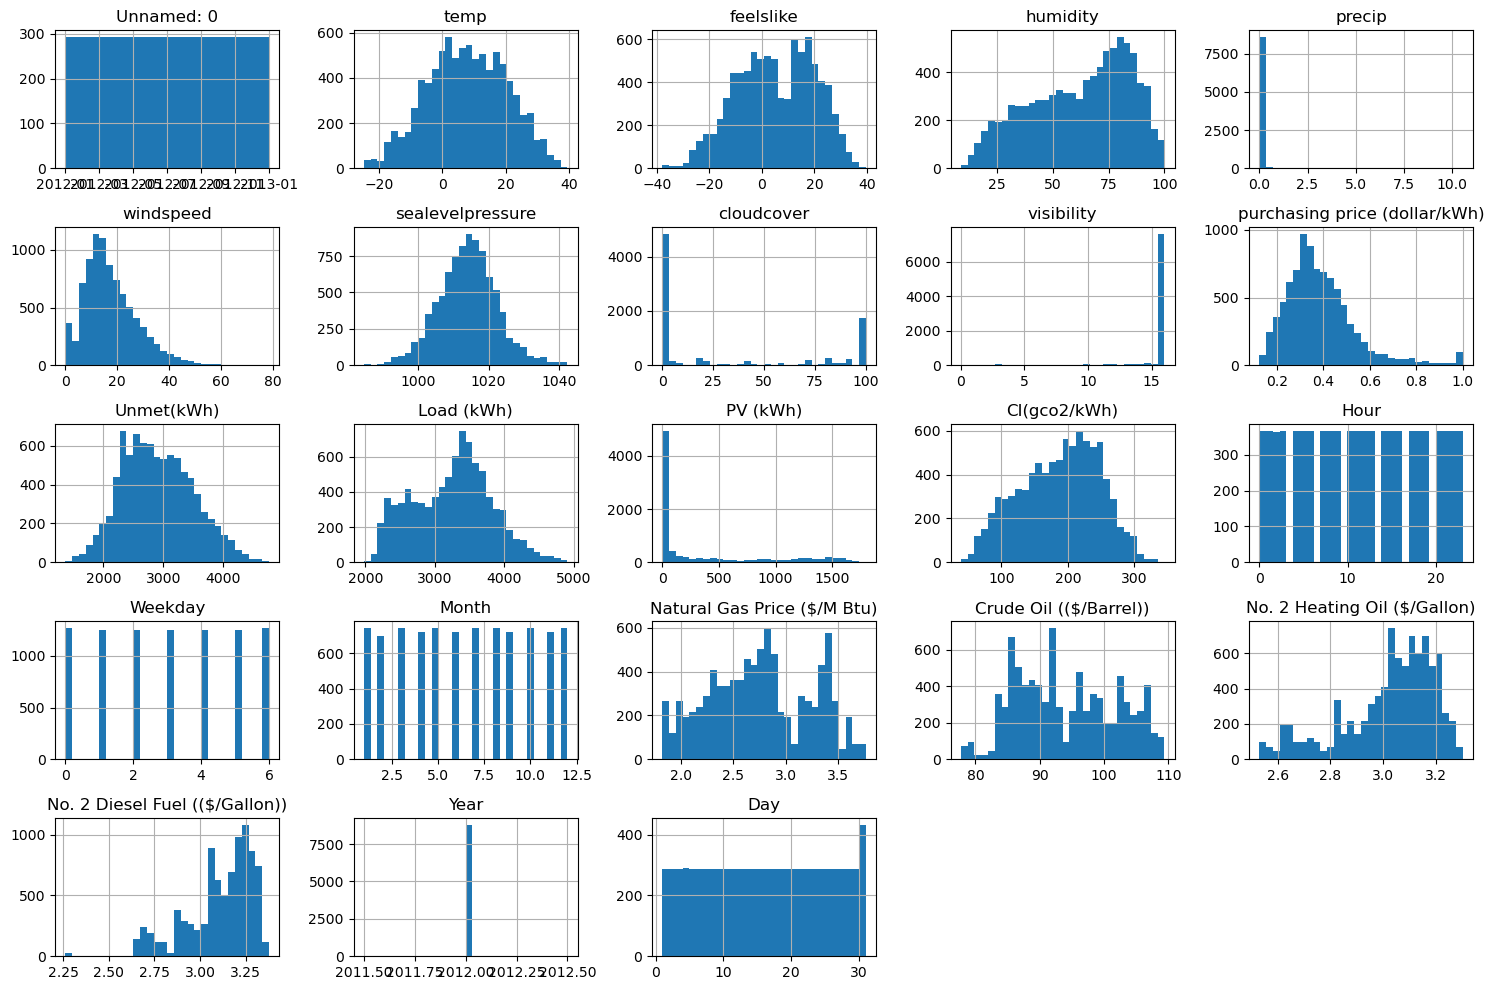

In [45]:
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


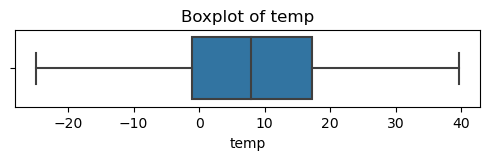

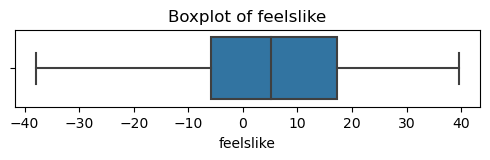

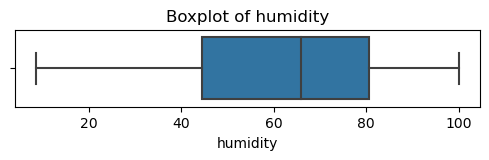

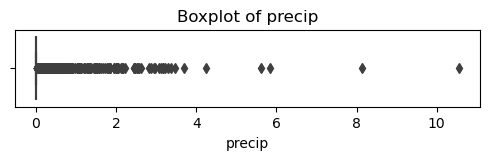

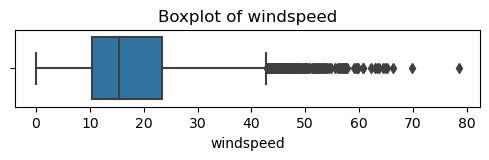

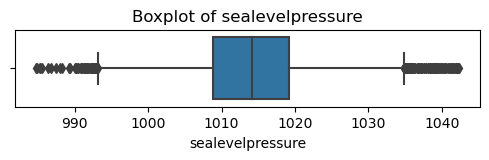

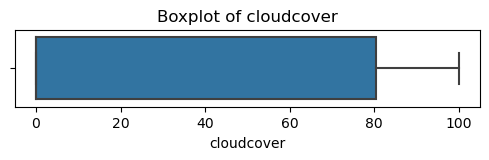

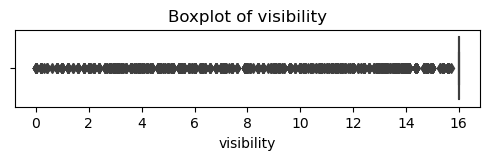

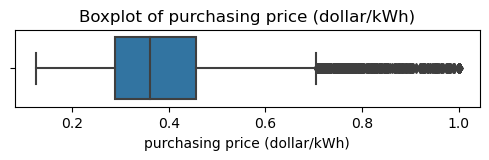

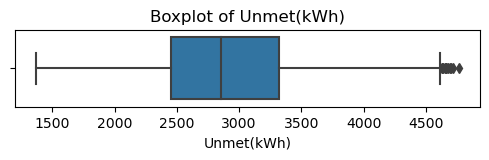

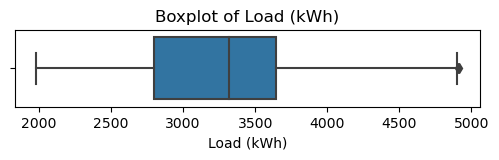

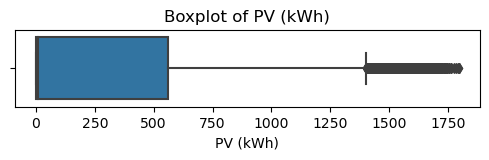

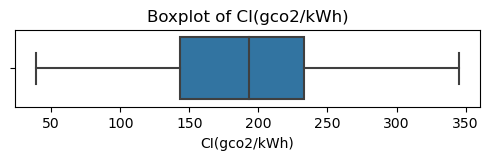

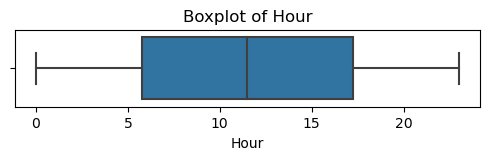

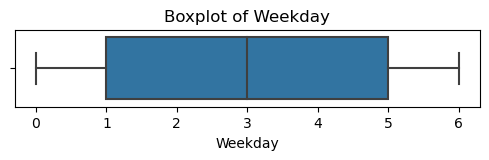

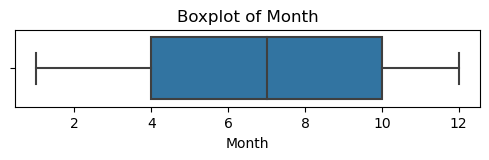

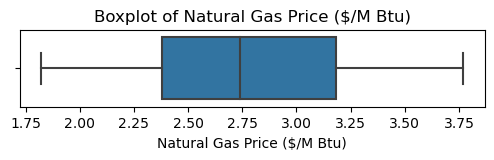

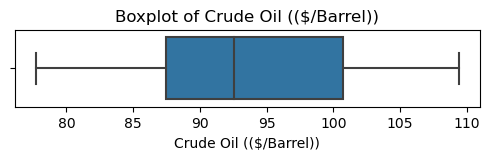

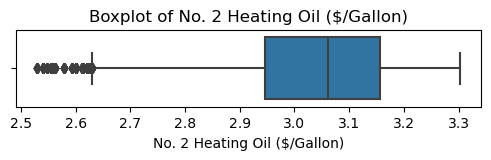

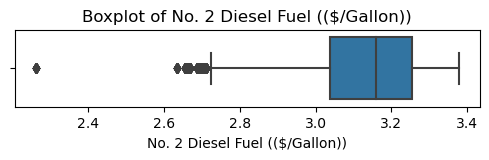

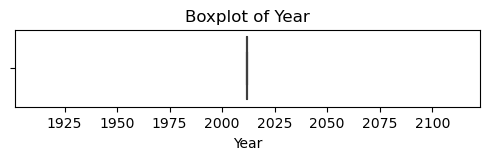

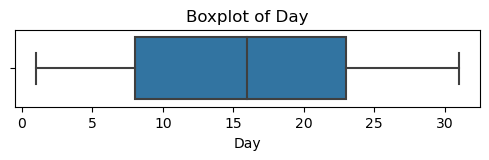

In [47]:
import seaborn as sns

for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Define your feature groups
zscore_cols = ['temp', 'feelslike', 'humidity', 'sealevelpressure', 
               'Unmet(kWh)', 'Load (kWh)', 'CI(gco2/kWh)']

minmax_cols = ['windspeed', 'purchasing price (dollar/kWh)', 
               'Natural Gas Price ($/M Btu)', 'Crude Oil (($/Barrel))',
               'No. 2 Heating Oil ($/Gallon)', 'No. 2 Diesel Fuel (($/Gallon))']

robust_cols = ['precip', 'cloudcover', 'visibility', 'PV (kWh)']

# Apply scalers
data[zscore_cols] = StandardScaler().fit_transform(df[zscore_cols])
data[minmax_cols] = MinMaxScaler().fit_transform(df[minmax_cols])
data[robust_cols] = RobustScaler().fit_transform(df[robust_cols])

In [50]:
data

,Unnamed: 0,temp,feelslike,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,purchasing price (dollar/kWh),...,CI(gco2/kWh),Hour,Weekday,Month,Natural Gas Price ($/M Btu),Crude Oil (($/Barrel)),No. 2 Heating Oil ($/Gallon),No. 2 Diesel Fuel (($/Gallon)),Year,Day
0,2012-01-01 00:00:00,-0.947762,-1.125229,-0.551869,0.0,0.340127,1.310000,0.516770,0.0,0.219021,...,-0.057280,0,6,1,0.589744,0.796969,0.659767,0.739247,2012,1
1,2012-01-01 01:00:00,-0.955778,-1.118431,-0.543274,0.0,0.324841,1.382618,1.216149,0.0,0.198445,...,-0.091056,1,6,1,0.589744,0.796969,0.659767,0.739247,2012,1
2,2012-01-01 02:00:00,-0.883635,-1.111634,-0.723319,0.0,0.435669,1.443132,1.242236,0.0,0.165638,...,-0.276820,2,6,1,0.589744,0.796969,0.659767,0.739247,2012,1
3,2012-01-01 03:00:00,-0.875619,-1.138823,-0.711557,0.0,0.509554,1.539955,1.242236,0.0,0.154778,...,-0.310595,3,6,1,0.589744,0.796969,0.659767,0.739247,2012,1
4,2012-01-01 04:00:00,-0.955778,-1.213594,-0.542370,0.0,0.481529,1.673088,0.242236,0.0,0.149977,...,-0.479471,4,6,1,0.589744,0.796969,0.659767,0.739247,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,-1.452766,-1.057255,0.854105,0.0,0.000000,0.886398,1.242236,-6.0,0.816415,...,-1.036764,19,0,12,0.825641,0.445532,0.664942,0.727599,2012,31
8780,2012-12-31 20:00:00,-1.500861,-1.356339,1.029625,0.0,0.080255,0.825883,1.242236,-5.2,0.765775,...,-1.222528,20,0,12,0.825641,0.445532,0.664942,0.727599,2012,31
8781,2012-12-31 21:00:00,-1.556973,-1.451502,0.812939,0.0,0.095541,0.874295,1.242236,-5.2,0.692844,...,-1.492730,21,0,12,0.825641,0.445532,0.664942,0.727599,2012,31
8782,2012-12-31 22:00:00,-1.573005,-1.376731,0.858176,0.0,0.064968,0.886398,1.242236,-4.9,0.658208,...,-1.729157,22,0,12,0.825641,0.445532,0.664942,0.727599,2012,31


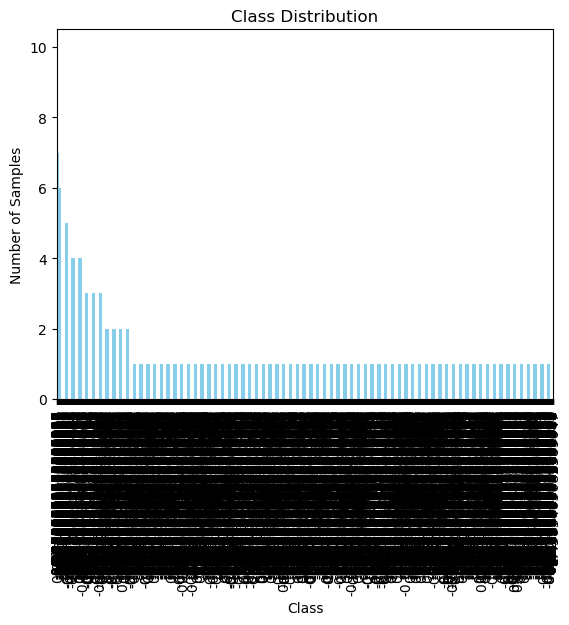

In [52]:
import matplotlib.pyplot as plt

# Replace 'target_column' with your actual target variable name
data['Unmet(kWh)'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()


In [53]:
print(df['Unmet(kWh)'].value_counts())
print("\nPercentage distribution:")
print(df['Unmet(kWh)'].value_counts(normalize=True) * 100)


2380.000000    10
2607.000000    10
2289.000000     9
2386.000000     9
2856.000000     9
               ..
1660.414953     1
1451.700292     1
1368.042829     1
1440.833193     1
3768.741712     1
Name: Unmet(kWh), Length: 6521, dtype: int64

Percentage distribution:
2380.000000    0.113843
2607.000000    0.113843
2289.000000    0.102459
2386.000000    0.102459
2856.000000    0.102459
                 ...   
1660.414953    0.011384
1451.700292    0.011384
1368.042829    0.011384
1440.833193    0.011384
3768.741712    0.011384
Name: Unmet(kWh), Length: 6521, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_9496\821152137.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_target = df.corr()[['purchasing price (dollar/kWh)']].sort_values(by='purchasing price (dollar/kWh)', ascending=False)


                                purchasing price (dollar/kWh)
purchasing price (dollar/kWh)                        1.000000
Load (kWh)                                           0.775415
Unmet(kWh)                                           0.503267
Hour                                                 0.420367
Natural Gas Price ($/M Btu)                          0.397332
PV (kWh)                                             0.271948
Month                                                0.244489
temp                                                 0.124810
CI(gco2/kWh)                                         0.117001
feelslike                                            0.101236
sealevelpressure                                     0.074445
windspeed                                            0.032644
Day                                                  0.027339
visibility                                           0.020726
cloudcover                                          -0.011728
precip  

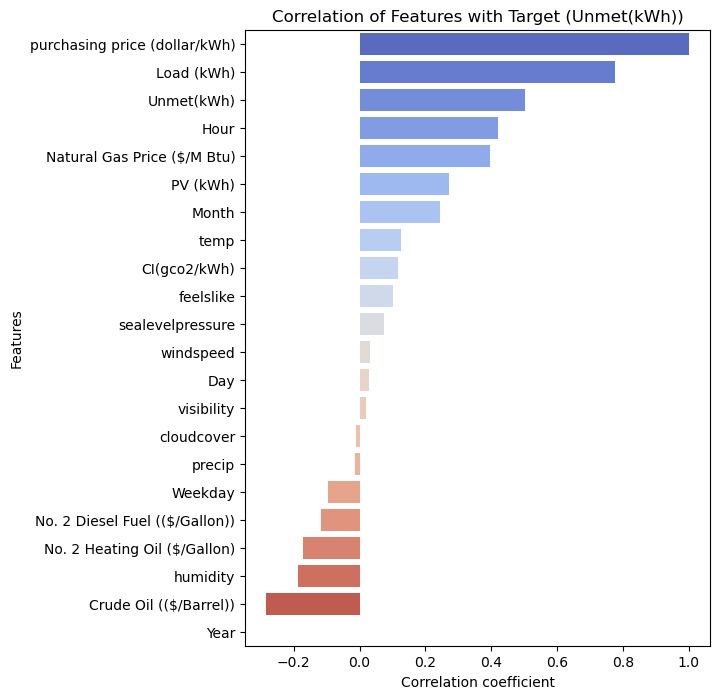

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is df and target column is 'Unmet(kWh)'

# Calculate correlation of all features with the target
corr_target = df.corr()[['purchasing price (dollar/kWh)']].sort_values(by='purchasing price (dollar/kWh)', ascending=False)

print(corr_target)

# Plot correlation of target with features
plt.figure(figsize=(6, 8))
sns.barplot(x=corr_target['purchasing price (dollar/kWh)'], y=corr_target.index, palette='coolwarm')
plt.title('Correlation of Features with Target (Unmet(kWh))')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()


In [62]:
corr_matrix = data.corr(numeric_only=True)

# Set target variable
target = 'purchasing price (dollar/kWh)'

# Set correlation threshold
threshold = 0.3  # You can adjust this

# Get absolute correlation with target
correlated_features = corr_matrix[target].abs()

# Drop NaN (e.g., Year might be NaN)
correlated_features = correlated_features.dropna()

# Select features above threshold, excluding the target itself
selected_features = correlated_features[correlated_features > threshold].drop(labels=[target])

# Print selected features
print("Selected features (correlation > {:.2f}):".format(threshold))
print(selected_features)

Selected features (correlation > 0.30):
Unmet(kWh)                     0.503267
Load (kWh)                     0.775415
Hour                           0.420367
Natural Gas Price ($/M Btu)    0.397332
Name: purchasing price (dollar/kWh), dtype: float64


In [63]:
# Create new DataFrame with selected features + target
df_selected = df[selected_features.index.tolist() + [target]]

# Save to new CSV file
df_selected.to_csv('selected_features_dataset.csv', index=False)

print("Saved dataset with selected features to 'selected_features_dataset.csv'")

Saved dataset with selected features to 'selected_features_dataset.csv'


In [64]:
or_df=pd.read_csv("selected_features_dataset.csv")
or_df

,Unmet(kWh),Load (kWh),Hour,Natural Gas Price ($/M Btu),purchasing price (dollar/kWh)
0,2698.000000,2698,0,2.97,0.3168
1,2558.000000,2558,1,2.97,0.2988
2,2444.000000,2444,2,2.97,0.2701
3,2402.000000,2402,3,2.97,0.2606
4,2403.000000,2403,4,2.97,0.2564
...,...,...,...,...,...
8779,3768.741712,3769,19,3.43,0.8394
8780,3585.000000,3585,20,3.43,0.7951
8781,3407.000000,3407,21,3.43,0.7313
8782,3219.000000,3219,22,3.43,0.7010


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


features = ['Unmet(kWh)', 'Load (kWh)', 'Hour', 'Natural Gas Price ($/M Btu)']
target = 'purchasing price (dollar/kWh)'

X = or_df[features]
y = or_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))

# Print results
print("Model comparison:")
print(f"{'Model':<25} {'RMSE':<10} {'R² Score':<10}")
for name, rmse, r2 in results:
    print(f"{name:<25} {rmse:<10.4f} {r2:<10.4f}")


Model comparison:
Model                     RMSE       R² Score  
Linear Regression         0.0916     0.6672    
Ridge Regression          0.0916     0.6672    
Lasso Regression          0.1589     -0.0014   
Random Forest             0.0630     0.8425    
Support Vector Regression 0.0796     0.7485    


In [68]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print accuracy summary
print(f"Random Forest Regressor Performance:")
print(f"R² Score: {r2:.4f} ({r2*100:.2f}%)")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Random Forest Regressor Performance:
R² Score: 0.8425 (84.25%)
Root Mean Squared Error (RMSE): 0.0630


In [69]:
new_data = {
    'Unmet(kWh)': [2698],              
    'Load (kWh)': [2698],               
    'Hour': [0],                        
    'Natural Gas Price ($/M Btu)': [2.97]  
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Scale new data (use the existing scaler)
new_data_scaled = scaler.transform(new_df)

# Predict using the trained Random Forest model
predicted_price = rf_model.predict(new_data_scaled)

print(f"Predicted purchasing price (dollar/kWh): {predicted_price[0]:.4f}")

Predicted purchasing price (dollar/kWh): 0.3443
